# Definition and Pipelining

To predict the popularity of music I will use a dataset containing audio statistics of the top 2000 tracks on Spotify from 2000-2019. The data contains about 18 columns each describing the track and its qualities.
I will be focusing more on Exploratory Data Analysis, visualising the patterns that occur over the years and trying to draw a tendency among them. For this purpose I will be using Seaborn and Matplotlib. The data shows that the numerical variables are not much linearly related, however the lack of correlation doesn't imply lack of relationship. 

In [1]:
import numpy as np
import pandas as pd
import os
import math
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import quantile_transform
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
pd.options.display.max_rows = 5

In [2]:
#Pipeline Controller
df = pd.read_csv("songs_normalize.csv")
df.columns = ['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'genre']
df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


Definition of variables:
- artist: Name of the Artist.
- song: Name of the Track.
- duration_ms: Duration of the track in milliseconds.
- explicit: The lyrics or content of a song or a music video contain one or more of the criteria which could be considered offensive or unsuitable for children.
- year: Release Year of the track.
- popularity: The higher the value the more popular the song is.
- danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
- energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity.
- key: The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
- loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
- mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
- speechiness: Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
- acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
- instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
- liveness: Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
- valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
- tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
- genre: Genre of the track.

# EDA and plotting
Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

In [3]:
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [4]:
df.shape #Return a tuple representing the dimensionality of the DataFrame.

(2000, 18)

The data set contains 2000 observations and 18 variables, out of which 1 is dependent and is usually calculated on the "y" axis (popularity). On the other hand, the random variable "x" is a variable whose values are numerical outcomes of a random phenomenon. Random variables can be either discrete or continuous in their nature, and in my case they are all continuous. 

In [5]:
#checking for missing values in each column
df.isna().any().sum()

0

In [6]:
#obtain information about every column in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [7]:
df.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [8]:
df.artist.value_counts().head(20)

Rihanna              25
Drake                23
Eminem               21
Calvin Harris        20
Britney Spears       19
David Guetta         18
Chris Brown          17
Kanye West           17
Beyoncé              16
Taylor Swift         16
Katy Perry           16
P!nk                 15
Ariana Grande        14
Black Eyed Peas      14
Coldplay             13
Maroon 5             13
Jason Derulo         13
Bruno Mars           12
Justin Timberlake    12
JAY-Z                12
Name: artist, dtype: int64

In [9]:
df.genre.value_counts().head(15)

pop                               428
hip hop, pop                      277
hip hop, pop, R&B                 244
pop, Dance/Electronic             221
pop, R&B                          178
hip hop                           124
hip hop, pop, Dance/Electronic     78
rock                               58
rock, pop                          43
Dance/Electronic                   41
rock, metal                        38
pop, latin                         28
pop, rock                          26
set()                              22
hip hop, Dance/Electronic          16
Name: genre, dtype: int64

In [11]:
df.popularity.value_counts().head(15)

0     126
69     76
68     75
73     69
74     69
67     66
76     64
64     63
63     62
72     62
57     62
65     61
61     61
71     57
77     57
Name: popularity, dtype: int64

In [10]:
#We can get how many possible values we have for one particular column using the method
df['duration_ms'].value_counts().unique

<bound method Series.unique of 212106    4
240040    3
207506    3
202066    3
243533    3
         ..
262466    1
208493    1
229040    1
222453    1
215280    1
Name: duration_ms, Length: 1793, dtype: int64>

In [11]:
#If we want to know if there are any, we can provide the option dropna=False.
df['duration_ms'].value_counts(dropna=False)

212106    4
240040    3
207506    3
202066    3
243533    3
         ..
262466    1
208493    1
229040    1
222453    1
215280    1
Name: duration_ms, Length: 1793, dtype: int64

Data has strings, floats, integers and one boolean. No variable column has null/missing values. 

In [13]:
#find summary stats from the data
df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,228748.124500,2009.49400,59.872500,0.667437,0.720366,5.378000,-5.512435,0.553500,0.103568,0.128955,0.015226,0.181216,0.551690,120.122558
std,39136.569008,5.85996,21.335577,0.140416,0.152745,3.615059,1.933482,0.497254,0.096159,0.173346,0.087771,0.140669,0.220864,26.967112
min,113000.000000,1998.00000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203580.000000,2004.00000,56.000000,0.581000,0.622000,2.000000,-6.490250,0.000000,0.039600,0.014000,0.000000,0.088100,0.386750,98.985750
50%,223279.500000,2010.00000,65.500000,0.676000,0.736000,6.000000,-5.285000,1.000000,0.059850,0.055700,0.000000,0.124000,0.557500,120.021500
75%,248133.000000,2015.00000,73.000000,0.764000,0.839000,8.000000,-4.167750,1.000000,0.129000,0.176250,0.000068,0.241000,0.730000,134.265500
max,484146.000000,2020.00000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


In [14]:
#Few key insights just by looking at dependent variable are as follows:
df.popularity.unique()

array([77, 79, 66, 78, 65, 69, 86, 68, 75,  1, 56, 55, 62, 61, 53, 64, 73,
       82, 83, 54, 72, 47, 71, 49, 58, 52, 59, 36, 43, 60, 63,  0, 70, 57,
       76, 74, 50, 42, 48, 67, 26, 46, 51, 30, 45, 87, 27, 85, 40,  2, 80,
       35, 24, 32, 81, 39,  3, 38, 44, 11, 16, 33, 37, 28,  4, 21, 41, 34,
       17, 18,  6, 88, 89, 84,  8,  7])

<AxesSubplot:>

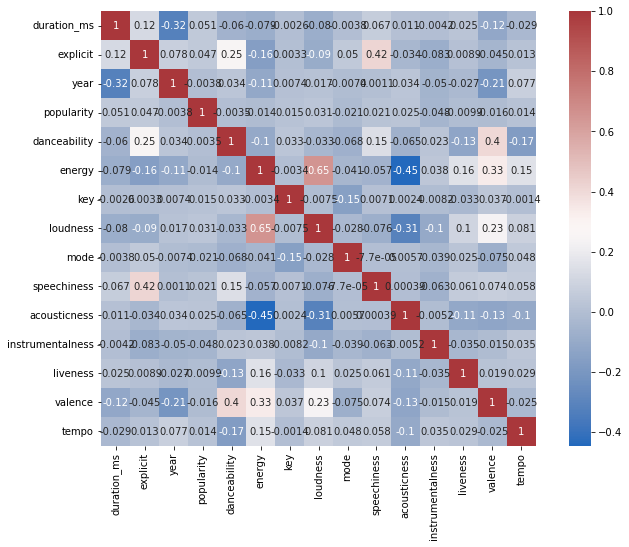

In [15]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='vlag', square=True, annot=True)

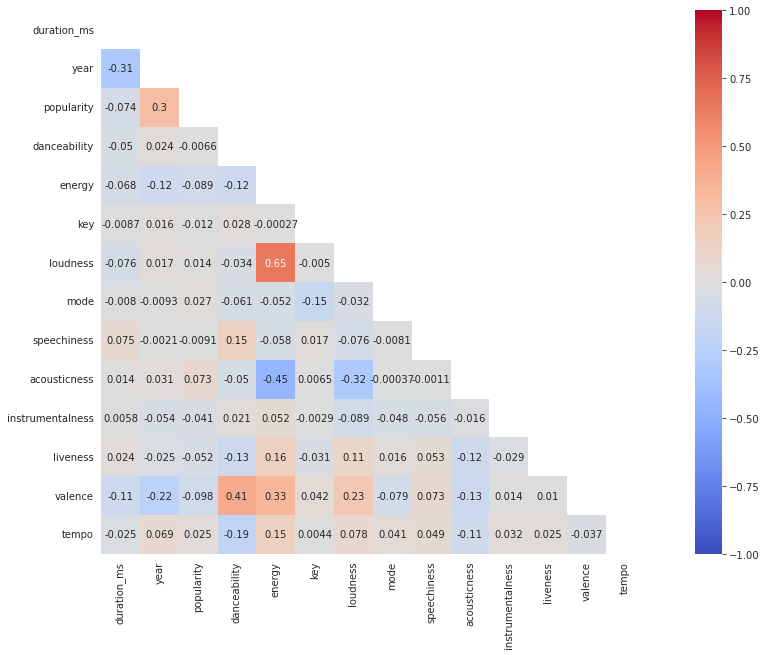

In [18]:
corr = df.where(df['popularity'] > 20).corr() #checking if there is anything interesting reducing the popularity values to the ones < 20 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(18, 10))
    ax = sns.heatmap(corr, mask=mask,cmap='coolwarm', vmin=-1,vmax=1,annot=True, square=True)

In [15]:
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
pio.renderers.default = "browser"

corr_matrix = df.corr()
fig = px.imshow(corr_matrix, text_auto=False, color_continuous_scale='Jet')
fig.show()
fig.write_image("/Users/costanzabrusutti/Documents")

ValueError: 
Cannot infer image type from output path '/Users/costanzabrusutti/Documents'.
Please add a file extension or specify the type using the format parameter.
For example:

    >>> import plotly.io as pio
    >>> pio.write_image(fig, file_path, format='png')


/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='popularity', ylabel='Density'>

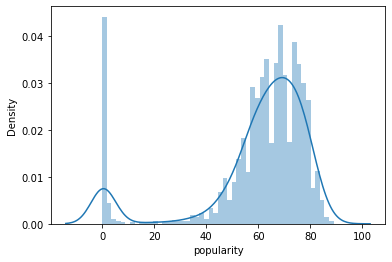

In [16]:
sns.distplot(df.popularity,bins=50,kde=True, norm_hist=False)

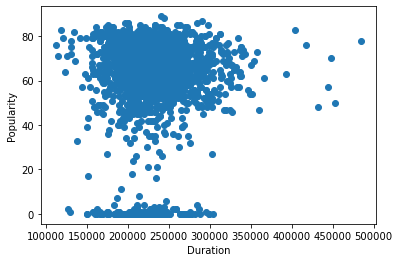

In [17]:
plt.scatter(x=df['duration_ms'], y=df['popularity'])
plt.xlabel('Duration')
plt.ylabel('Popularity')
plt.show()

In [18]:
df.loc[df.popularity == 0]

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
59,Oasis,Go Let It Out,278666,False,2000,0,0.408,0.849,2,-5.631,1,0.0333,0.01360,0.000025,0.5600,0.628,84.192,"Folk/Acoustic, rock"
62,Mariah Carey,Against All Odds (Take A Look at Me Now) (feat...,199480,False,2011,0,0.471,0.514,1,-5.599,1,0.0315,0.58400,0.000000,0.1030,0.373,117.338,"pop, R&B"
126,Jennifer Lopez,Ain't It Funny,246160,False,2001,0,0.707,0.869,5,-4.525,0,0.0481,0.10400,0.000121,0.0813,0.621,99.825,"hip hop, pop, R&B"
175,DB Boulevard,Point Of View - Radio Edit,231166,False,2018,0,0.676,0.715,6,-6.854,1,0.0287,0.00284,0.074600,0.0685,0.275,129.006,Dance/Electronic
182,Musiq Soulchild,Love,304666,False,2000,0,0.569,0.385,1,-9.919,0,0.0499,0.34200,0.000000,0.0876,0.339,99.738,"pop, R&B"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1789,CNCO,Reggaetón Lento (Remix),188786,False,2017,0,0.623,0.909,4,-3.079,0,0.0758,0.15800,0.000000,0.0972,0.651,93.984,"pop, latin"
1794,Shawn Mendes,Mercy,208733,False,2017,0,0.561,0.674,4,-4.882,0,0.0818,0.11800,0.000000,0.1110,0.383,148.127,pop
1850,Loud Luxury,Body (feat. brando),163216,False,2017,0,0.752,0.764,1,-4.399,1,0.0380,0.04760,0.000094,0.0543,0.582,121.958,"pop, Dance/Electronic"
1913,NLE Choppa,Shotta Flow (feat. Blueface) [Remix],176631,True,2019,0,0.894,0.511,2,-4.768,1,0.4200,0.02510,0.000000,0.1400,0.568,120.080,hip hop


In [19]:
df.sort_values('popularity', axis=0, ascending=True)['artist'].tail(20)

1344       Arctic Monkeys
1326       Arctic Monkeys
1700           Ed Sheeran
1511           The Weeknd
1910        Lewis Capaldi
1905        Gesaffelstein
1227           Bruno Mars
1304           Bruno Mars
1999          Post Malone
1512    The Neighbourhood
1514               Avicii
1709           Ed Sheeran
209                Eminem
1929        Billie Eilish
1613               WILLOW
6                  Eminem
1819        Billie Eilish
201                Eminem
1311            Tom Odell
1322    The Neighbourhood
Name: artist, dtype: object

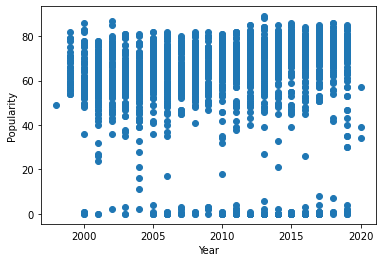

In [20]:
plt.scatter(x=df['year'], y=df['popularity'])
plt.xlabel('Year')
plt.ylabel('Popularity')
plt.show()

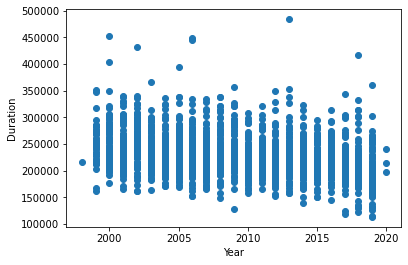

In [19]:
plt.scatter(x=df['year'], y=df['duration_ms'])
plt.xlabel('Year')
plt.ylabel('Duration')
plt.show()

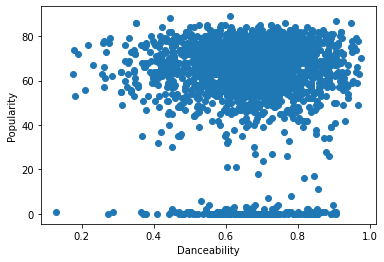

In [22]:
plt.scatter(x=df['danceability'], y=df['popularity'])
plt.xlabel('Danceability')
plt.ylabel('Popularity')
plt.show()

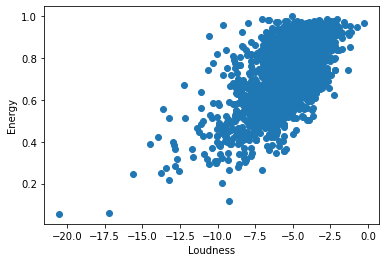

In [23]:
plt.scatter(x=df['loudness'], y=df['energy'])
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.show()

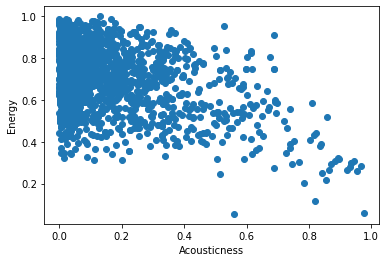

In [24]:
plt.scatter(x=df['acousticness'], y=df['energy'])
plt.xlabel('Acousticness')
plt.ylabel('Energy')
plt.show()

array([[<AxesSubplot:title={'center':'duration_ms'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'popularity'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'loudness'}>,
        <AxesSubplot:title={'center':'mode'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'instrumentalness'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'valence'}>,
        <AxesSubplot:title={'center':'tempo'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

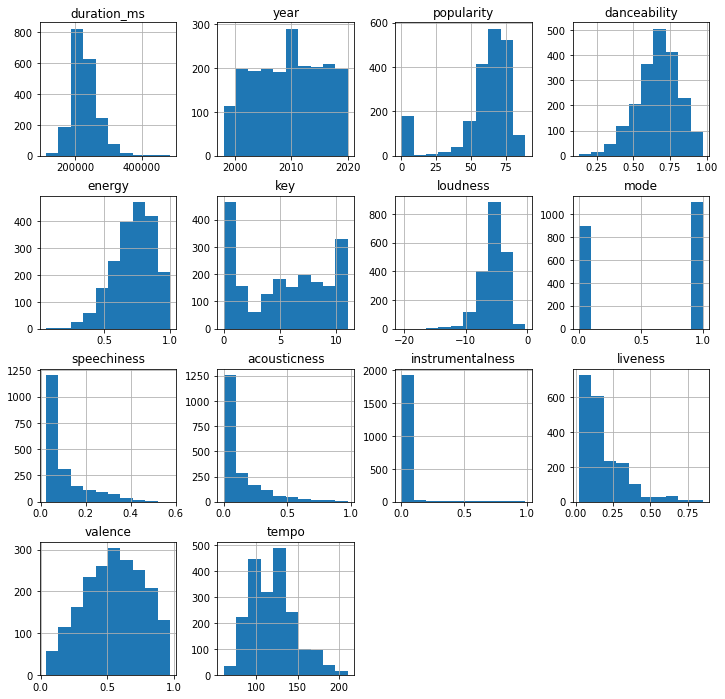

In [25]:
df.hist(figsize=(12,12))

/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

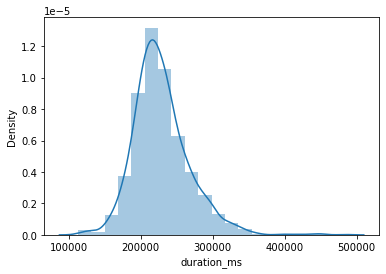

In [26]:
#checkin the distribution plot
sns.distplot((df['duration_ms']), bins=20)

/opt/anaconda3/envs/DA_env/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

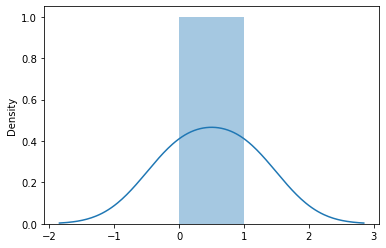

In [34]:
sns.distplot(df)

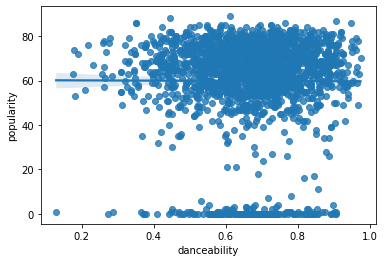

In [27]:
#The function regplot() plot data and a linear regression model fit. 
#It draws a scatterplot of two variables, x and y, and then fit the regression model y ~ x 
#and plot the resulting regression line and a 95% confidence interval for that regression.
sns.regplot(x="danceability", y="popularity", data=df)
plt.show()

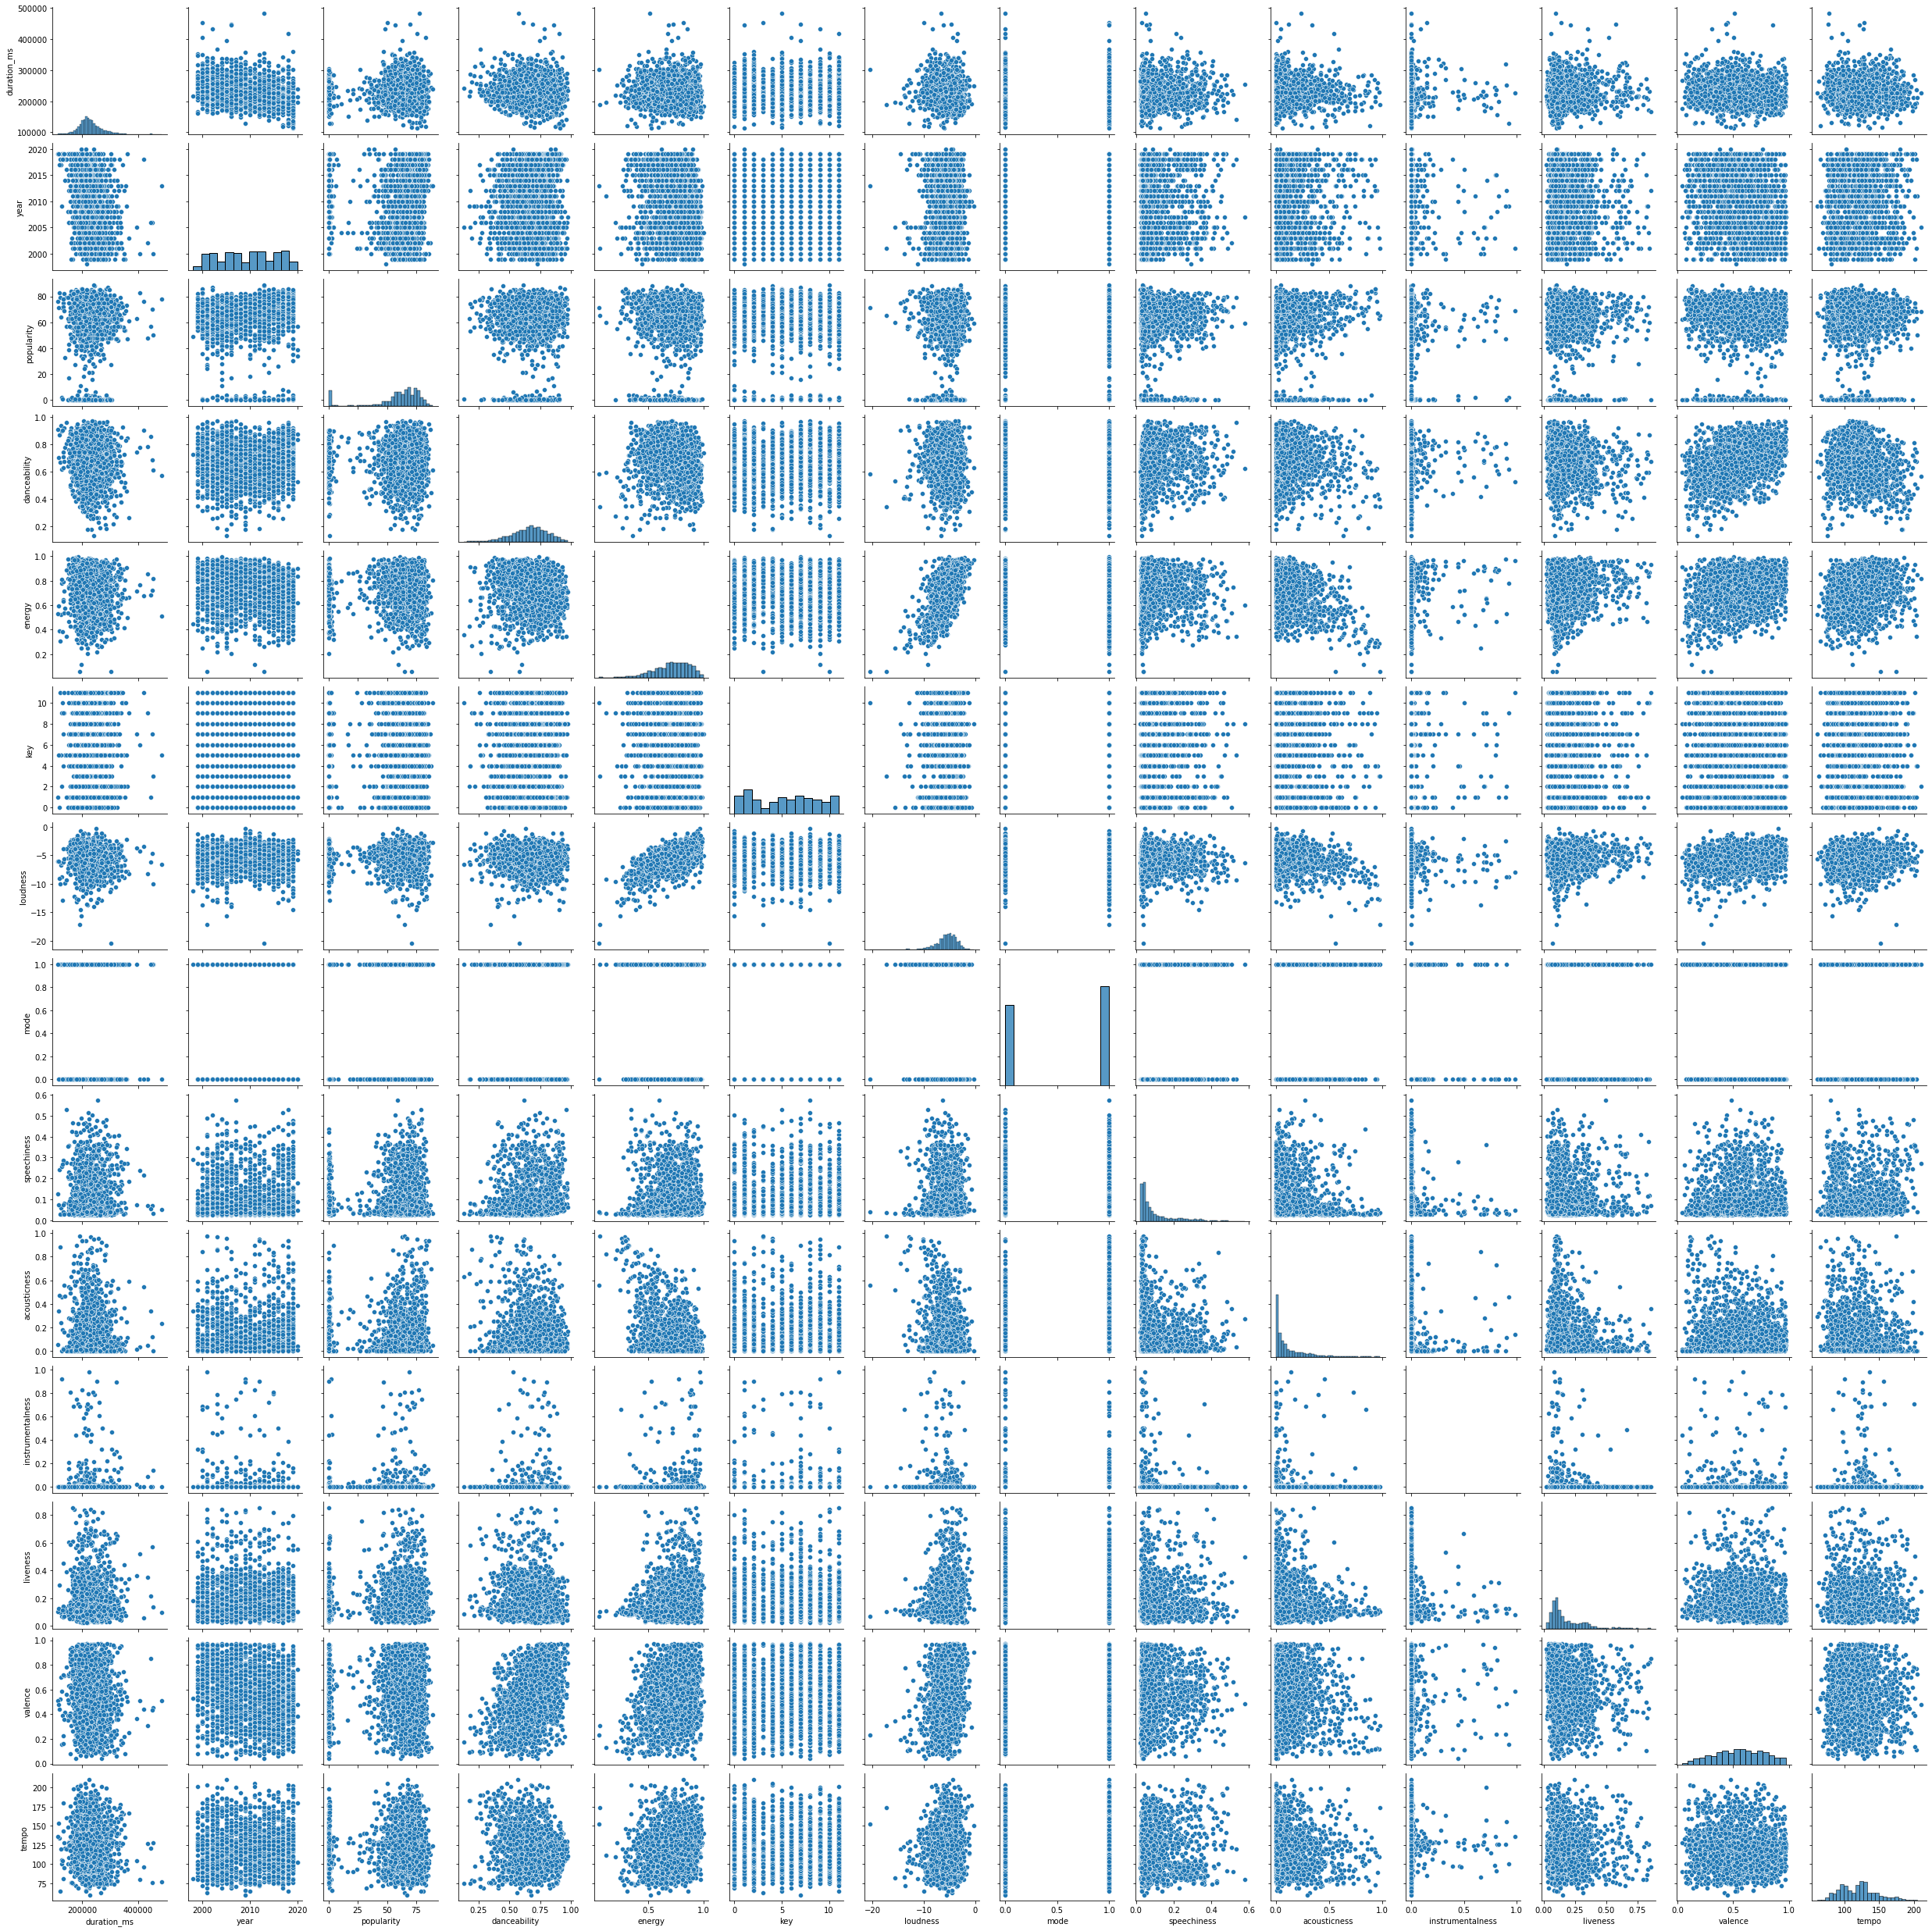

In [28]:
#Pair plots in order to quickly explore distributions and relationships in a dataset
sns.pairplot(df.drop(columns='explicit'))
def hide_current_axis(*args, **kwds):
    plt.gca(df).set_visible(False)

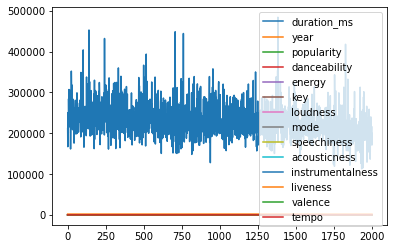

In [29]:
#save figure

df.plot().get_figure().savefig('output.png')

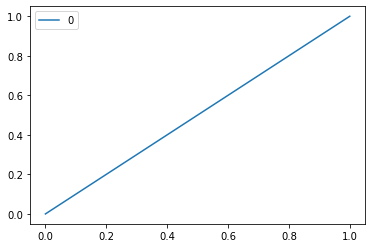

In [30]:
df = pd.DataFrame([0, 1])
ax = df.plot.line()
ax.figure.savefig('demo-file.pdf')

In [ ]:
#filter genre: how is the trend? Exploratory analysis

In [23]:
#Number of songs per year
trend = df.groupby('genre')[['year', 'popularity']].mean()
trend

,year,popularity
genre,,
Dance/Electronic,2009.682927,51.756098
"Folk/Acoustic, pop",2008.000000,78.000000
"Folk/Acoustic, rock",2000.000000,0.000000
"Folk/Acoustic, rock, pop",2009.000000,68.000000
R&B,2007.461538,60.461538
...,...,...
"rock, pop",2007.604651,66.511628
"rock, pop, Dance/Electronic",2013.875000,51.375000
"rock, pop, metal",2004.500000,60.500000


<AxesSubplot:xlabel='year'>

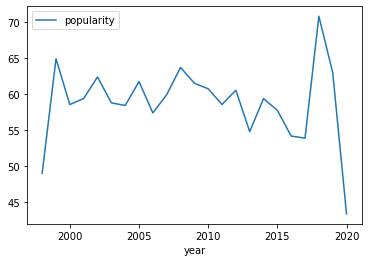

In [33]:
df.groupby('year')[['popularity', 'genre']].mean().plot()

Text(0, 0.5, 'POPULARITY')

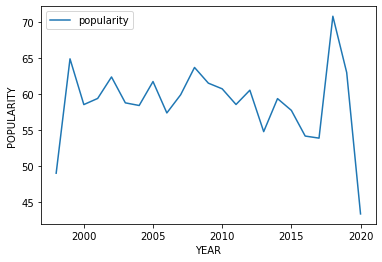

In [35]:
df.groupby('year')[['genre', 'popularity']].mean().plot()
plt.xlabel('YEAR')
plt.ylabel('POPULARITY')

In [36]:
trend = df.groupby(['genre', 'year']).aggregate({'popularity': 'mean'})
#trend.reset_index(inplace=True, drop=False)
trend.head(30)

,genre,year,popularity
0,Dance/Electronic,1999,56.000000
1,Dance/Electronic,2000,50.000000
2,Dance/Electronic,2001,59.400000
3,Dance/Electronic,2002,48.000000
4,Dance/Electronic,2003,57.000000
5,Dance/Electronic,2004,62.000000
6,Dance/Electronic,2005,63.000000
7,Dance/Electronic,2006,53.000000
8,Dance/Electronic,2007,73.000000
9,Dance/Electronic,2008,56.000000


<AxesSubplot:xlabel='year', ylabel='popularity'>

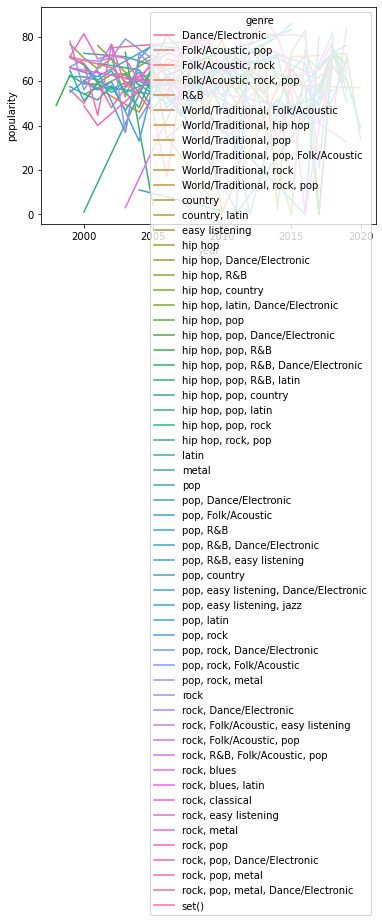

In [37]:
sns.lineplot(x='year', y='popularity', hue='genre', data=trend)

In [40]:
df.genre.unique()

array(['pop', 'rock, pop', 'pop, country', 'rock, metal',
       'hip hop, pop, R&B', 'hip hop', 'pop, rock', 'pop, R&B',
       'Dance/Electronic', 'pop, Dance/Electronic',
       'rock, Folk/Acoustic, easy listening', 'metal', 'hip hop, pop',
       'R&B', 'pop, latin', 'Folk/Acoustic, rock',
       'pop, easy listening, Dance/Electronic', 'rock',
       'rock, blues, latin', 'pop, rock, metal', 'rock, pop, metal',
       'hip hop, R&B', 'pop, Folk/Acoustic', 'set()',
       'hip hop, pop, latin', 'hip hop, Dance/Electronic',
       'hip hop, pop, rock', 'World/Traditional, Folk/Acoustic',
       'Folk/Acoustic, pop', 'rock, easy listening',
       'World/Traditional, hip hop', 'hip hop, pop, R&B, latin',
       'rock, blues', 'rock, R&B, Folk/Acoustic, pop', 'latin',
       'pop, R&B, Dance/Electronic', 'World/Traditional, rock',
       'pop, rock, Dance/Electronic', 'pop, easy listening, jazz',
       'rock, Dance/Electronic', 'World/Traditional, pop, Folk/Acoustic',
       'countr

In [48]:
rock = df['genre'].str.contains("rock")
df['rock'] = df['genre'].loc[rock]

In [47]:
pop = df['genre'].str.contains("pop")
df['pop'] = df['genre'].loc[pop]

In [ ]:
print(df.genre('rock' = 23000 and `Courses Fee` <= 24000”))

In [51]:
df.query('genre==rock')

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre,rock,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.01030,0.000000,0.612,0.684,148.726,"rock, pop","rock, pop","rock, pop"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.02630,0.000013,0.347,0.544,119.992,"rock, metal","rock, metal",NaN
7,Robbie Williams,Rock DJ,258560,False,2000,68,0.708,0.772,7,-4.264,1,0.0322,0.02670,0.000000,0.467,0.861,103.035,"pop, rock","pop, rock","pop, rock"
13,Sting,Desert Rose,285960,False,1999,62,0.586,0.659,0,-7.920,0,0.0304,0.01100,0.000000,0.106,0.147,111.989,"rock, pop","rock, pop","rock, pop"
20,Linkin Park,In the End,216880,False,2000,83,0.556,0.864,3,-5.870,0,0.0584,0.00958,0.000000,0.209,0.400,105.143,"rock, metal","rock, metal",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,FINNEAS,Let's Fall in Love for the Night,190348,True,2018,71,0.737,0.408,5,-7.941,1,0.1040,0.80200,0.000000,0.171,0.374,127.921,"rock, pop, Dance/Electronic","rock, pop, Dance/Electronic","rock, pop, Dance/Electronic"
1890,Cashmere Cat,Miss You (with Major Lazer & Tory Lanez),186231,False,2018,56,0.747,0.641,1,-4.502,1,0.0925,0.25000,0.001070,0.106,0.453,100.028,"pop, rock","pop, rock","pop, rock"
1916,Alec Benjamin,Let Me Down Slowly,169353,False,2018,82,0.652,0.557,1,-5.714,0,0.0318,0.74000,0.000000,0.124,0.483,150.073,"rock, pop, Dance/Electronic","rock, pop, Dance/Electronic","rock, pop, Dance/Electronic"
1977,Dominic Fike,3 Nights,177666,False,2018,78,0.815,0.518,7,-6.594,0,0.0897,0.22300,0.000000,0.104,0.877,151.891,"rock, pop","rock, pop","rock, pop"


In [53]:
df.str.contains('rock|pop|hip hop', regex=True)

AttributeError: 'DataFrame' object has no attribute 'str'